# Surprise Housing

### Introduction:
As Surprise Housing ventures into the Australian real estate market, the company seeks to leverage data analytics to make informed decisions about property investments. By analyzing a dataset containing information about house sales in Australia, Surprise Housing aims to build a regression model using regularization techniques to predict the actual value of prospective properties. This predictive model will enable the company to identify undervalued properties, thereby maximizing potential profits through strategic acquisitions and sales.


### Objective:
The primary objective of this analysis is to develop a regression model that accurately predicts house prices based on various independent variables. Through this model, Surprise Housing aims to uncover significant predictors of house prices and gain insights into the underlying pricing dynamics of the Australian housing market. Additionally, the company seeks to determine the optimal values of lambda for Ridge and Lasso regression, which are essential for effective regularization.

The solution is divided into the following sections:
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
house = pd.read_csv('train.csv')

In [7]:
# Display basic information about the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
house.shape

(1460, 81)

In [9]:
# Summary statistics of numeric columns
print(house.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [11]:
# Check for missing values
print(house.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


#### Data Cleaning:

Handle Missing Values:


In [12]:
#Street Column: Most properties have a paved road access ("Pave"), indicating imbalance and lack of diversity. Consider removing it unless contextually significant.
#Alley Column: Majority of properties have no alley access ("NA"). Consider removing it due to limited variability.
#Utilities Column: Almost all properties have "AllPub" utilities, indicating all public utilities. Consider removing unless the distinction is crucial.
#Condition2 Column: Majority of properties have "Norm" conditions, suggesting normal conditions without specific proximity. Consider removal due to lack of variability.
#RoofMatl Column: Majority have "CompShg" roof material, indicating standard composite shingles. Consider removing due to lack of diversity.
#LandSlope Column: Majority have a "Gtl" (Gentle slope) land slope. Consider removal unless the slope significantly impacts the target variable.
#Consider removing these columns for simplicity and potentially improved model performance, depending on your specific analysis needs.

columns_to_remove = ["Street", "Alley", "PoolQC", "MiscFeature", "Utilities", "Condition2","Condition2", "RoofMatl", "LandSlope","Heating","Functional","GarageCond","BsmtFinType2","Neighborhood", "Utilities","LotFrontage","Id","Exterior1st","ExterQual","Fence","FireplaceQu","MoSold","YrSold","MiscVal", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "LowQualFinSF", "BsmtFinSF2"]
house = house.drop(columns=columns_to_remove)

In [13]:
# Filling NA with proper valuse
house[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']] = house[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']].fillna('NB')
house[['GarageType','GarageFinish','GarageQual']] = house[['GarageType','GarageFinish','GarageQual']].fillna('NG')
house['MasVnrType'] = house['MasVnrType'].fillna('Not_avail')

In [14]:
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['YearBuilt'])

In [15]:
house['MasVnrArea'].fillna(0, inplace=True)

In [16]:
# only one NA is there so filled with mode()
house['Electrical'].fillna(house['Electrical'].mode()[0], inplace=True)

In [17]:
#These are categorical variable so converting to category
columns_to_convert = ['MSSubClass', 'OverallQual', 'OverallCond']
house[columns_to_convert] = house[columns_to_convert].astype('object')

#### Now that we have a clean dataset with no missing values, we can proceed with our analysis

In [21]:
# Converting all object dtype to category
# Get object columns
object_columns = house.select_dtypes(include=['object']).columns

# Convert object columns to category type
house[object_columns] = house[object_columns].astype('category')

## Step: Visualize the Distribution of the Target Variable 'SalePrice':
-Visualize the distribution of the target variable ('SalePrice') to understand its shape and range.

-A histogram provides insights into the distribution of bike rentals.

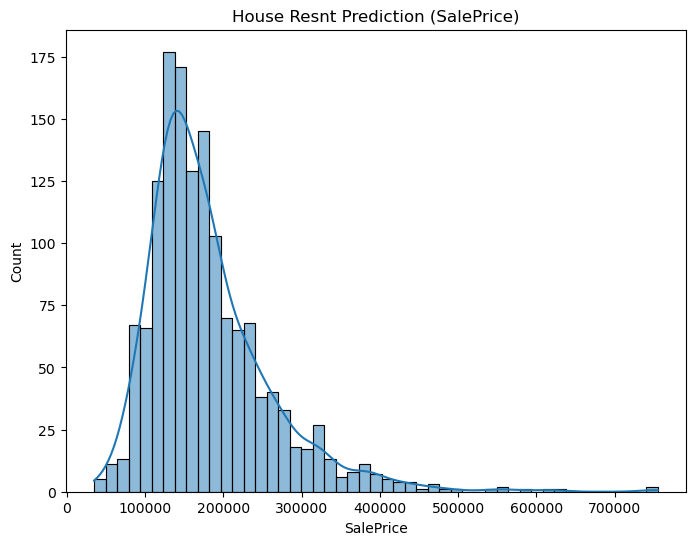

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(house['SalePrice'], kde=True)
plt.title('House Resnt Prediction (SalePrice)')
plt.show()

### Correlation Matrix

In [22]:
house_numeric = house.select_dtypes(include=['float64', 'int64'])

In [23]:
cor = house_numeric.corr()
cor

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
LotArea,1.000000,0.014228,0.013788,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,...,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.003669,0.154871,0.180403,0.263843
YearBuilt,0.014228,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,...,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.845141,0.537850,0.478954,0.522897
YearRemodAdd,0.013788,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,...,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.604353,0.420622,0.371600,0.507101
MasVnrArea,0.103321,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,...,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.267224,0.361945,0.370884,0.472614
BsmtFinSF1,0.214103,0.249503,0.128451,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,...,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.184657,0.224054,0.296970,0.386420
BsmtUnfSF,-0.002618,0.149040,0.181133,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,...,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.175605,0.214175,0.183303,0.214479
TotalBsmtSF,0.260833,0.391452,0.291066,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,...,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.345936,0.434585,0.486665,0.613581
1stFlrSF,0.299475,0.281986,0.240379,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,...,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.265777,0.439317,0.489782,0.605852
2ndFlrSF,0.050986,0.010308,0.140024,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,...,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.059777,0.183926,0.138347,0.319334
GrLivArea,0.263116,0.199010,0.287389,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,...,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.235387,0.467247,0.468997,0.708624


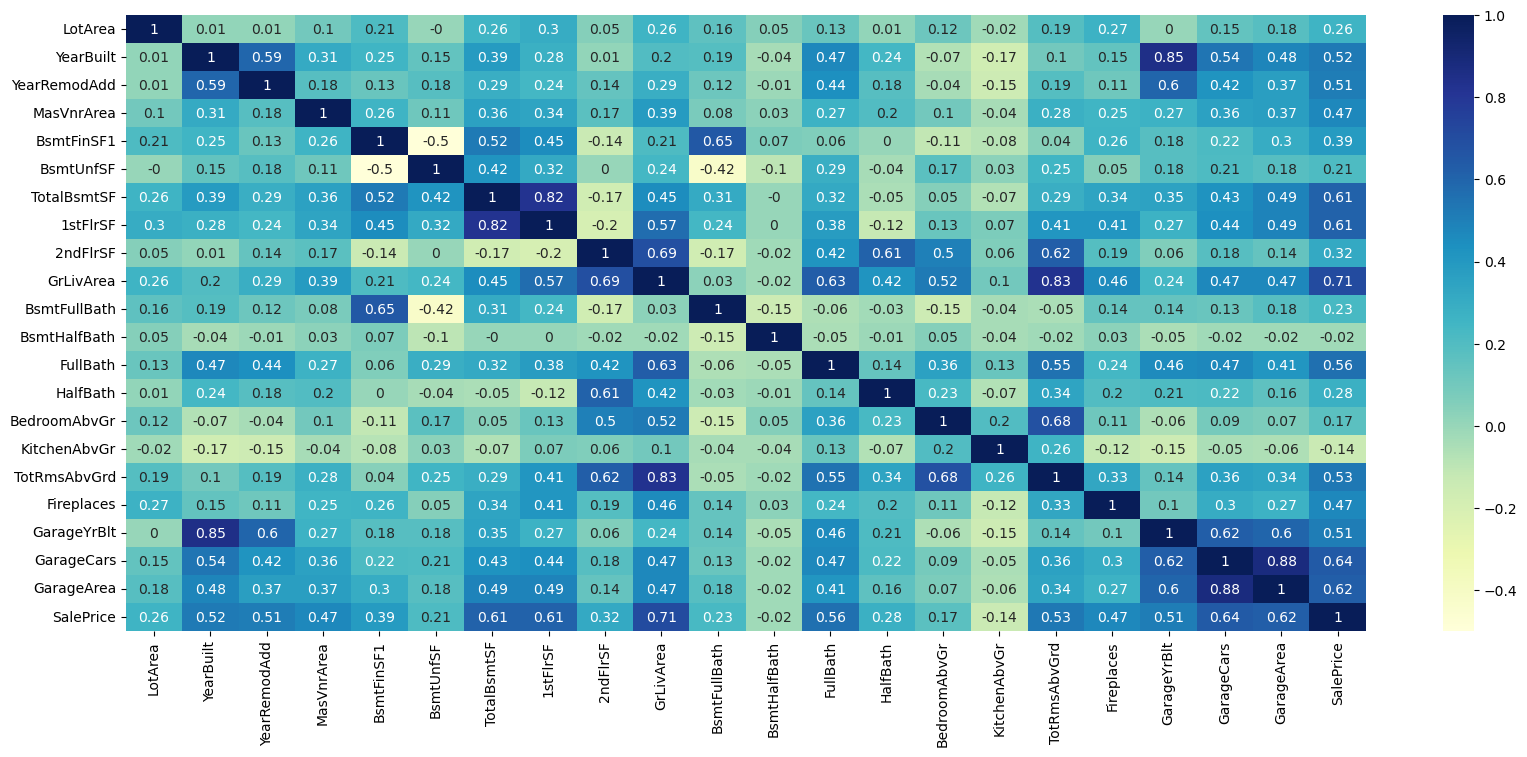

In [24]:
# plotting correlations on a heatmap
cor = cor.round(2)
# figure size
plt.figure(figsize=(20,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


- The correlation matrix shows the strength and direction of the relationships between all pairs of numeric variables in the dataset.
- The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
- The diagonal elements are all 1 because each variable is perfectly correlated with itself.
- The heatmap visualization highlights the strongest correlations in the dataset. For example, the strongest positive correlations are between OverallQual and SalePrice (0.79), YearBuilt and YearRemodAdd (0.64), and FullBath and HalfBath (0.56).
- The strongest negative correlations are between YearBuilt and GarageYrBlt (-0.57), MasVnrArea and MasVnrType (-0.47), and BsmtFinSF1 and BsmtFinSF2 (-0.44).
- These correlations can be used to identify potential features for inclusion in a regression model, as well as to identify potential multicollinearity issues.

In [27]:
# prompt: write a code to fetch all column except the last one

X = house.iloc[:, :-1]
y = house['SalePrice']

In [28]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['category'])
house_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,...,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Norm,1Fam,2Story,7,5,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Feedr,1Fam,1Story,6,8,...,Ex,Y,SBrkr,TA,Attchd,RFn,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Norm,1Fam,2Story,7,5,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Norm,1Fam,2Story,7,5,...,Gd,Y,SBrkr,Gd,Detchd,Unf,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Norm,1Fam,2Story,8,5,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal


In [29]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
X = X.drop(list(house_categorical.columns),axis=1)

In [31]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [32]:
X.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,150,856,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,284,1262,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,434,920,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,540,756,961,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,490,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0


In [34]:
X_numeric = house.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice'])

### split into train and test
## 3. Data Preparation


#### Data Preparation

Let's now prepare the data and build the model.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [36]:
X_numeric.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [38]:
# Assuming X_train is your feature matrix

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your training data and transform it
X_train[X_numeric.columns] = scaler.fit_transform(X_train[X_numeric.columns])

# Apply the same scaler to your test data
X_test[X_numeric.columns] = scaler.transform(X_test[X_numeric.columns])

In [39]:
X_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.019306,0.384058,0.000000,0.00,0.082920,0.169521,0.141408,0.113889,0.000000,0.081860,...,0,0,0,0,1,0,0,0,1,0
318,0.039403,0.876812,0.716667,0.16,0.174876,0.154110,0.220458,0.231481,0.616949,0.424289,...,0,0,0,0,1,0,0,0,1,0
239,0.033981,0.528986,0.000000,0.00,0.016655,0.274401,0.120295,0.098611,0.333656,0.201576,...,0,0,0,0,1,0,0,0,1,0
986,0.017931,0.275362,0.883333,0.00,0.000000,0.207620,0.079378,0.145602,0.307022,0.230015,...,0,0,0,0,1,0,0,0,1,0
1416,0.046139,0.094203,0.000000,0.00,0.000000,0.332620,0.127169,0.202315,0.505569,0.355880,...,0,0,0,0,1,0,0,0,1,0


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [40]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [42]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)
ridge_coef = ridge.coef_

[ 1.56785405e+04  8.97286071e+03  8.68677355e+03  2.90156241e+04
  9.03948611e+03  1.52257672e+04  1.93577849e+04  3.41905465e+04
  4.96290269e+04  4.77487005e+04  1.86106926e+04  2.01556050e+03
  3.26893087e+04  1.21868826e+04  7.41272743e+03 -1.31807539e+04
  2.97037245e+04  2.88594545e+04 -1.23954619e+03  3.47367139e+04
  1.85165970e+04 -5.34387571e+03  2.14875014e+03  4.85438549e+03
  3.76778951e+03 -1.40595085e+03  9.57032495e+03  2.21385103e+03
 -2.48621297e+03 -4.34716123e+03 -4.96095781e+03 -6.96620787e+03
 -6.02983719e+03 -4.32749167e+03 -4.62342879e+03  9.84603508e+03
  8.71743474e+03  5.80255672e+03 -7.08613978e+02  5.85127928e+03
 -1.01422509e+04 -1.89902979e+03  7.59561487e+03  1.62610810e+04
  1.31647423e+04  9.69395817e+03 -8.92265830e+03 -7.10049068e+02
 -2.69064179e+03 -3.50699193e+03  1.02347148e+04  9.23402482e+03
 -8.39686408e+03 -4.66549837e+03  6.01413393e+03 -1.36334260e+03
 -1.46472432e+03 -4.62342879e+03 -4.96095781e+03 -6.62959399e+03
 -8.23661426e+03  6.25216

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8636370867375516
0.8500748415311249
870090676946.8999
422595922790.9756
852194590.5454456
964830873.9519991


In [44]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [46]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [47]:
lasso.coef_

array([ 10698.24853493,  15833.77596683,   5489.088974  ,  27864.79237767,
           -0.        ,   6677.91888812,      0.        ,      0.        ,
        48344.55028837, 200419.69063744,  20722.13352881,      0.        ,
        21971.44355696,   3801.11184862,      0.        , -28444.91084529,
         3033.0904043 ,  24265.96106439,      0.        ,  48193.97416258,
            0.        ,  -2123.40693574,      0.        ,      0.        ,
         4620.00107915,     -0.        ,   9552.94288688,     -0.        ,
           -0.        ,     -0.        ,     -0.        ,  -5171.80308754,
           -0.        ,     -0.        ,     -0.        ,   4736.66310471,
          514.97142402,   1450.97959121,  -4842.15727724,   5420.66170042,
        -7501.80992476,   -911.21820609,   8635.1708666 ,  20092.92095539,
        15170.91333841,  10990.48650224,  -3768.37728384,      0.        ,
         -479.52699399,   -425.53701293,  13082.01045939,   5582.26411352,
        -7765.26310765,  

In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8705820365483008
0.8608028409704596
825777044027.0242
392356776345.73193
808792403.5524232
895791726.8167396


In [52]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        
        }

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression,Lasso Regression
0,8.636371e-01,8.705820e-01
1,8.500748e-01,8.608028e-01
2,8.700907e+11,8.257770e+11
3,4.225959e+11,3.923568e+11
4,2.919237e+04,2.843928e+04
5,3.106173e+04,2.992978e+04


In [53]:
betas = pd.DataFrame(index=X.columns)

In [54]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [55]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotArea,15678.540520,10698.248535
YearBuilt,8972.860705,15833.775967
YearRemodAdd,8686.773554,5489.088974
MasVnrArea,29015.624134,27864.792378
BsmtFinSF1,9039.486112,-0.000000
BsmtUnfSF,15225.767203,6677.918888
TotalBsmtSF,19357.784863,0.000000
1stFlrSF,34190.546523,0.000000
2ndFlrSF,49629.026940,48344.550288
GrLivArea,47748.700525,200419.690637


From the analysis, we can conclude the following:

Significant Variables for Predicting House Price:

Both Ridge and Lasso regression techniques have identified several variables that are significant in predicting house prices. These include features related to the size and quality of the house (e.g., GrLivArea, OverallQual), features related to the garage (e.g., GarageCars, GarageArea), and features related to the lot (e.g., LotArea).
Description of Price by Significant Variables:

The identified significant variables provide insights into how various aspects of a house contribute to its price. For example, variables like GrLivArea (above ground living area square feet), OverallQual (overall material and finish quality), and GarageCars (size of garage in car capacity) are positively associated with house prices. Conversely, certain features like KitchenAbvGr (number of kitchens above ground) and some subclasses of MSSubClass have a negative association with house prices, indicating that they might decrease the overall value of a property.
Overall, the identified significant variables offer valuable information for understanding the factors that influence house prices, providing guidance for homeowners, real estate professionals, and policymakers involved in the housing market.

### For Ridge Regression:

R^2 score for the first dataset: 0.8636
R^2 score for the second dataset: 0.8501
Higher R^2 scores indicate a better fit of the model to the data. A score of 1 indicates a perfect fit, while scores closer to 0 suggest that the model does not explain much of the variance in the data.
### For Lasso Regression:

R^2 score for the first dataset: 0.8706
R^2 score for the second dataset: 0.8608
Similar to Ridge Regression, higher R^2 scores indicate better model fit.
Comparing the R^2 scores between Ridge and Lasso Regression for each dataset, we can observe that Lasso Regression generally performs slightly better in terms of fitting the data, as it achieves higher R^2 scores. However, the difference between the two methods is relatively small.

Overall, both Ridge and Lasso Regression seem to provide good fits to the data, with Lasso Regression performing slightly better based on the R^2 scores provided.

-R^2 score for the train dataset (**alpha=8): 0.8636**

-R^2 score for the test dataset (**alpha=8): 0.8501**

Higher R^2 scores indicate a better fit of the model to the data. A score of 1 indicates a perfect fit, while scores closer to 0 suggest that the model does not explain much of the variance in the data.

For Lasso Regression:

-R^2 score for the train dataset (**alpha=100): 0.8706**

-R^2 score for the test dataset (**alpha=100): 0.8608**